<a href="https://colab.research.google.com/github/pritybisen17/AI/blob/main/Horse_vs_Human_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Horse vs Human Classifier

In [ ]:
# Access the google drive to import the required data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the required library
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
import os

In [ ]:
#Directory with our training horse pictures
train_horses_dir = os.path.join('/content/drive/MyDrive/Machine Learning/horse-or-human/horses')
#Directory with our training human pictures
train_humans_dir = os.path.join('/content/drive/MyDrive/Machine Learning/horse-or-human/humans')

In [ ]:
#Checking the path
print(train_horses_dir)

/content/drive/MyDrive/Machine Learning/horse-or-human/horses


In [ ]:
print(train_humans_dir)

/content/drive/MyDrive/Machine Learning/horse-or-human/humans


In [ ]:
train_horses_name = os.listdir(train_horses_dir)
print(train_horses_name[:10])

train_humans_name = os.listdir(train_humans_dir)
print(train_horses_name[:10])



['horse01-6.png', 'horse01-2.png', 'horse01-0.png', 'horse01-1.png', 'horse01-5.png', 'horse01-3.png', 'horse01-4.png', 'horse04-7.png', 'horse04-2.png', 'horse04-1.png']
['horse01-6.png', 'horse01-2.png', 'horse01-0.png', 'horse01-1.png', 'horse01-5.png', 'horse01-3.png', 'horse01-4.png', 'horse04-7.png', 'horse04-2.png', 'horse04-1.png']


In [ ]:
print("total training horses images:", len(os.listdir(train_horses_dir)))
print("total training humans images:", len(os.listdir(train_humans_dir)))

total training horses images: 500
total training humans images: 522


In [ ]:
#Plotting the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph ; we will output images in a 4*4 congiguration
nrows = 4
ncols = 4

#Index for iterating over images
pic_index = 0

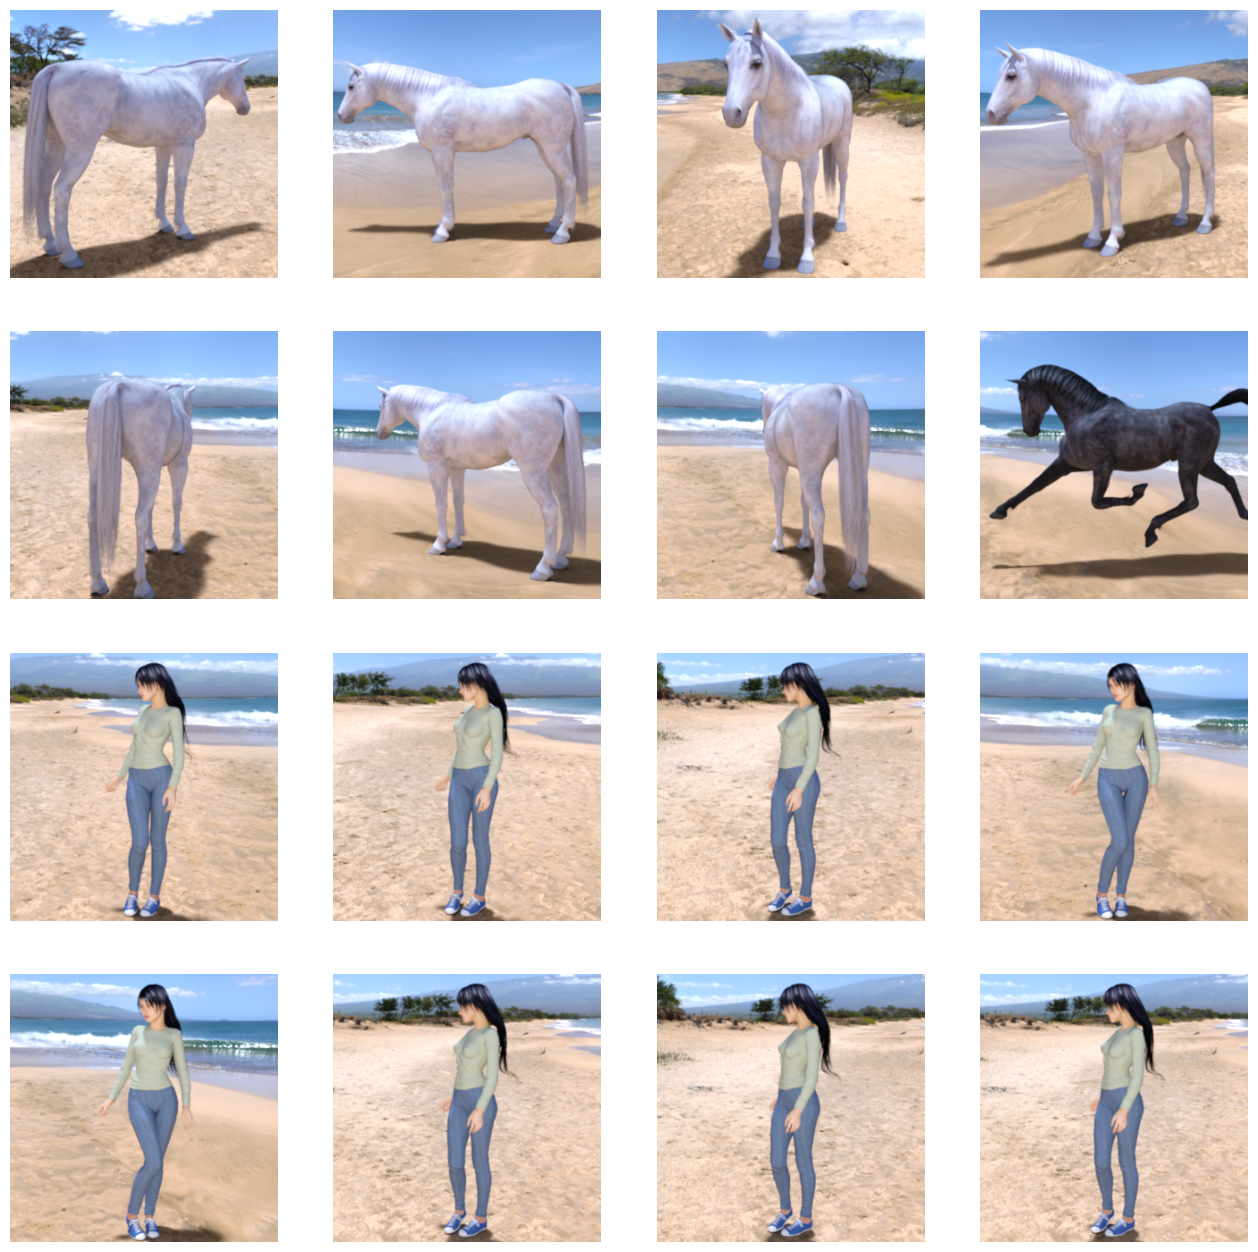

In [ ]:
# setup matplotlib fig , and size it to fit 4*4 pixs
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horses_pix = [os.path.join(train_horses_dir, fname)
 for fname in train_horses_name[pic_index-8:pic_index]]
next_humans_pix = [os.path.join(train_humans_dir, fname)
                  for fname in train_humans_name[pic_index-8:pic_index] ]

for i, img_path in enumerate(next_horses_pix+next_humans_pix):
  # setup subplot ; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off') # (do not show axis or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:

# input shape is desired size of images 300*300 with 3 channel RGB
inp_layer = Input(shape=(300,300,3))
# first layer(Convolution)
conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp_layer)
# Second layer(Convolution)
conv2 = Conv2D(32, kernel_size=3, activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv2)
# Third layer(Convolution)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
# Fourth layer(Convolution)
conv4 = Conv2D(64, kernel_size=3, activation='relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten1 = Flatten()(pool2)

# Fully connected layer
dense1 = Dense(64, activation = 'relu')(flatten1)
op_layer = Dense(1, activation='sigmoid')(dense1)

model_clf = Model(inputs=inp_layer, outputs=op_layer )

In [ ]:
model_clf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 64)      36928     
                                                             

In [ ]:
# Compile the model
model_clf.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
#Normalization
# We need to work on data
# Create a image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1.0/255

train_data_gen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
#setting the directory for training and validation
train_path = '/content/drive/MyDrive/Machine Learning/horse-or-human/'
validation_path ='/content/drive/MyDrive/Machine Learning/validation-horse-or-human/'

In [ ]:
# Training and validation path
#(Flow traning images in batches of 20 using train_data_generator )

train_data_generator = train_data_gen.flow_from_directory(
    train_path,                                 #(This is the source directory for training images)
    target_size = (300,300),                    # Fix the size of the images to 300,300
    batch_size = 20,

# since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'

)

Found 1022 images belonging to 2 classes.


In [ ]:
validation_data_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size = (300,300),
    batch_size = 20,
    class_mode = 'binary'

)

Found 247 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.98):
      print("Plese stop training our model is ready")
      self.model.stop_training=True

In [ ]:
# early stopping
callback = myCallback()

In [ ]:
history  = model_clf.fit_generator(
    train_data_generator,
    epochs = 30,
    validation_data = validation_data_generator,
    callbacks = [callback]
)

<ipython-input-20-ef4b795291f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model_clf.fit_generator(


Epoch 1/30
52/52 [==============================] - 484s 9s/step - loss: 0.6300 - accuracy: 0.7613 - val_loss: 1.8690 - val_accuracy: 0.8259
Epoch 2/30
52/52 [==============================] - 472s 9s/step - loss: 0.1233 - accuracy: 0.9618 - val_loss: 2.1601 - val_accuracy: 0.7814
Epoch 3/30
52/52 [==============================] - 474s 9s/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 2.0980 - val_accuracy: 0.7733


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_clf.predict(images, batch_size=20)
print (classes[0])
if classes[0]>0.5:
  print(fn + " is a human")
else:
    print(fn + " is a horse")


Saving horse04-2.png to horse04-2.png
1/1 [==============================] - 0s 221ms/step
[0.]
horse04-2.png is a horse
